In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [46]:
df = pd.read_csv(r"C:\Users\rauna\codes\datasets\Algerian_forest_fires_cleaned_dataset.csv")

In [47]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [49]:
df.drop(columns=["day","month","year"], inplace=True)

In [50]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [51]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [52]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [53]:
df["Classes"] = np.where(df["Classes"].str.contains( "not fire"),0,1)
#str.contains is used because Classes contain diff names format for same word

In [54]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [55]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

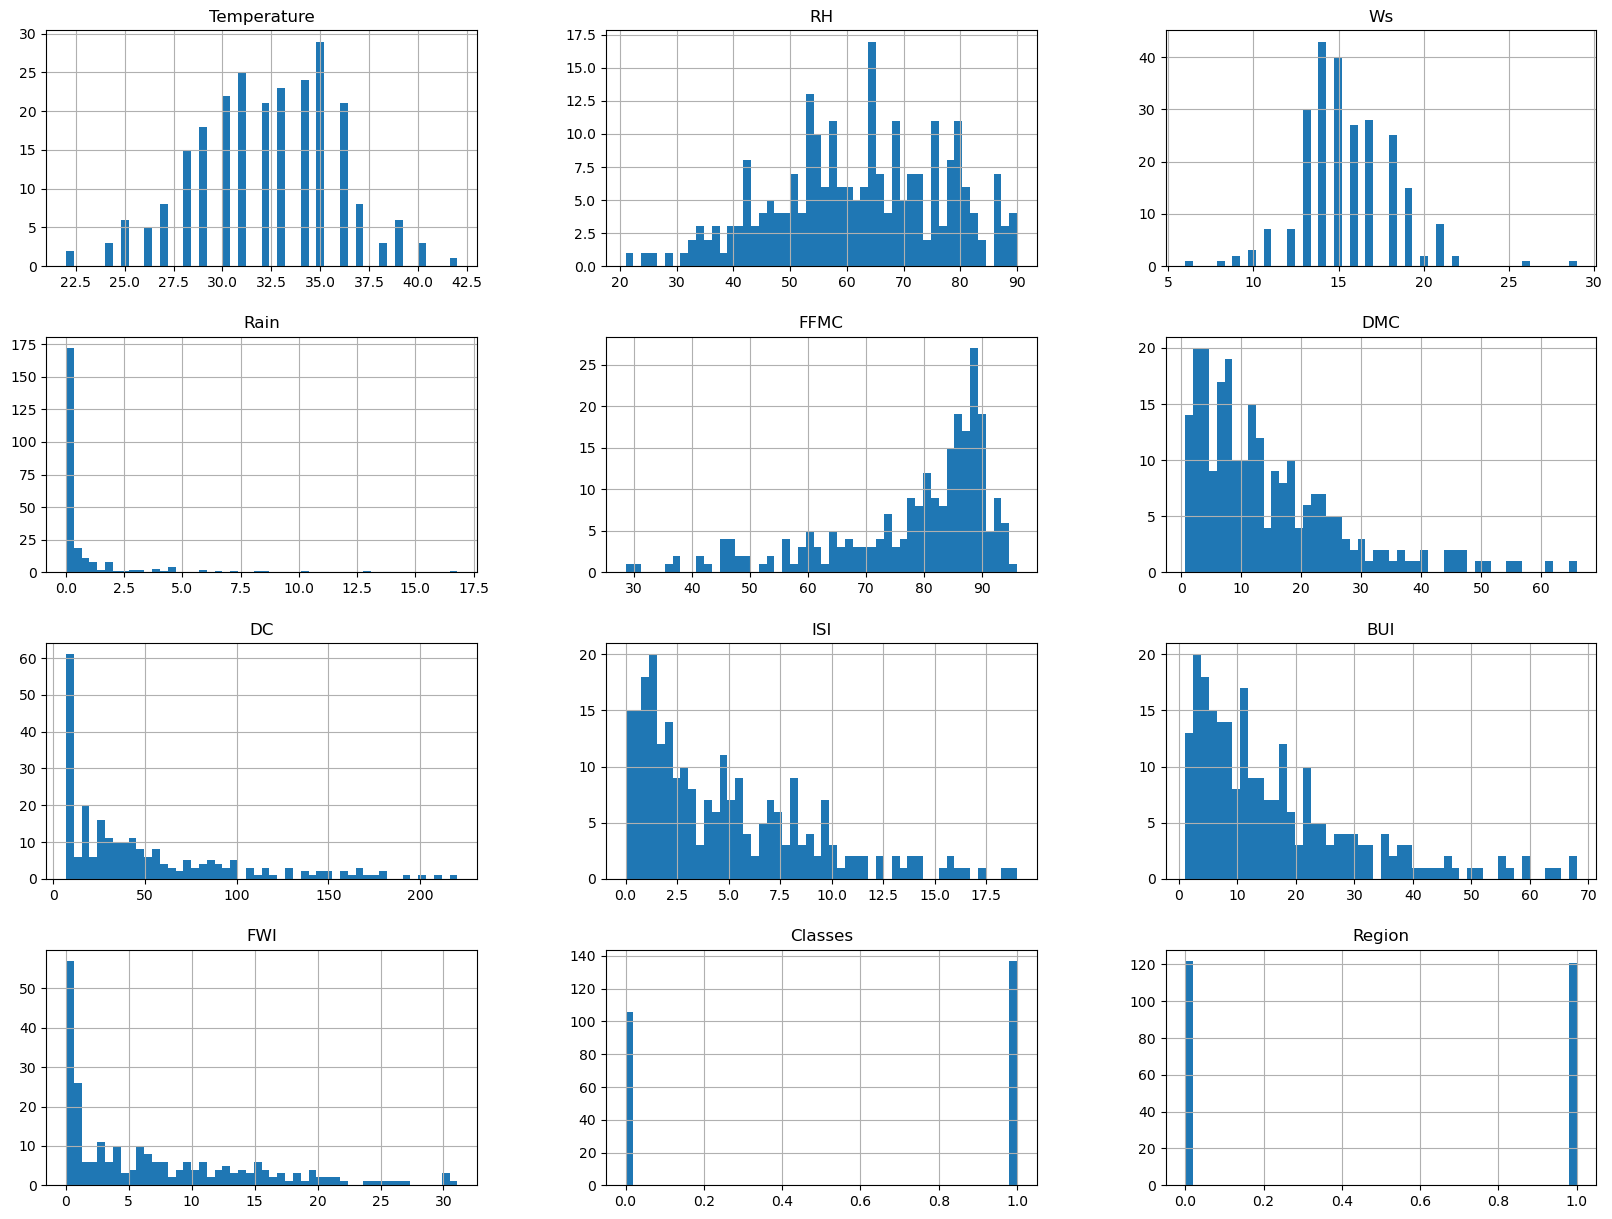

In [56]:
df.hist(bins = 50, figsize=(20,15),)
plt.show()

<Axes: >

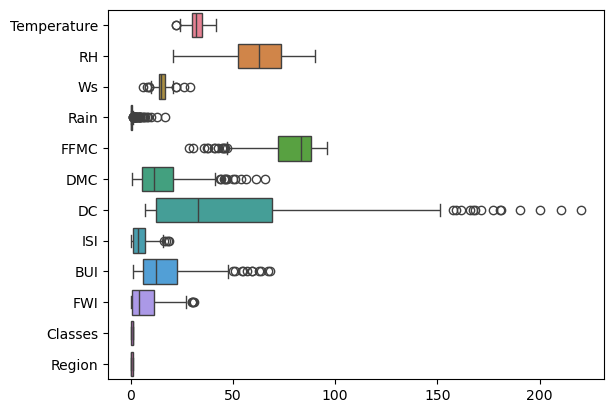

In [57]:
sns.boxplot(df,orient="h")


<Axes: xlabel='DC'>

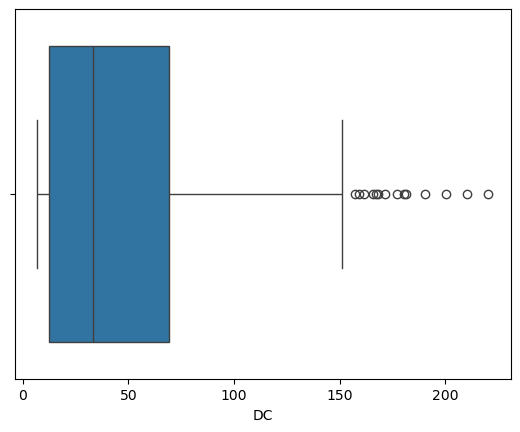

In [58]:
sns.boxplot(df["DC"], orient="h")

<Axes: xlabel='FWI'>

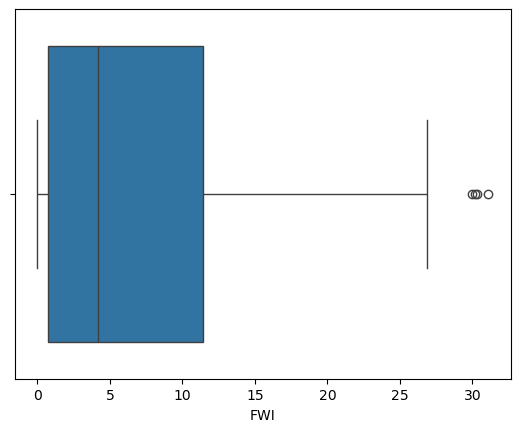

In [59]:
sns.boxplot(df["FWI"], orient="h")

<Axes: xlabel='Rain'>

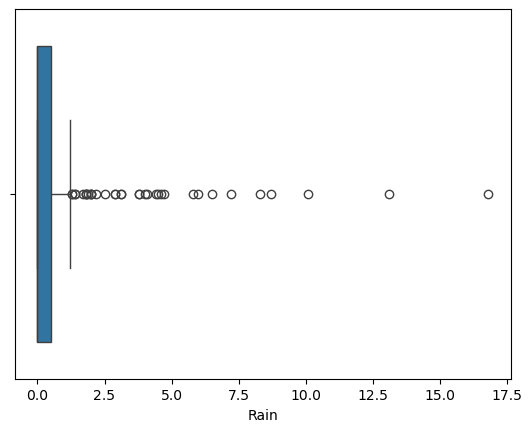

In [60]:
sns.boxplot(df["Rain"],orient="h")

In [61]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [62]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

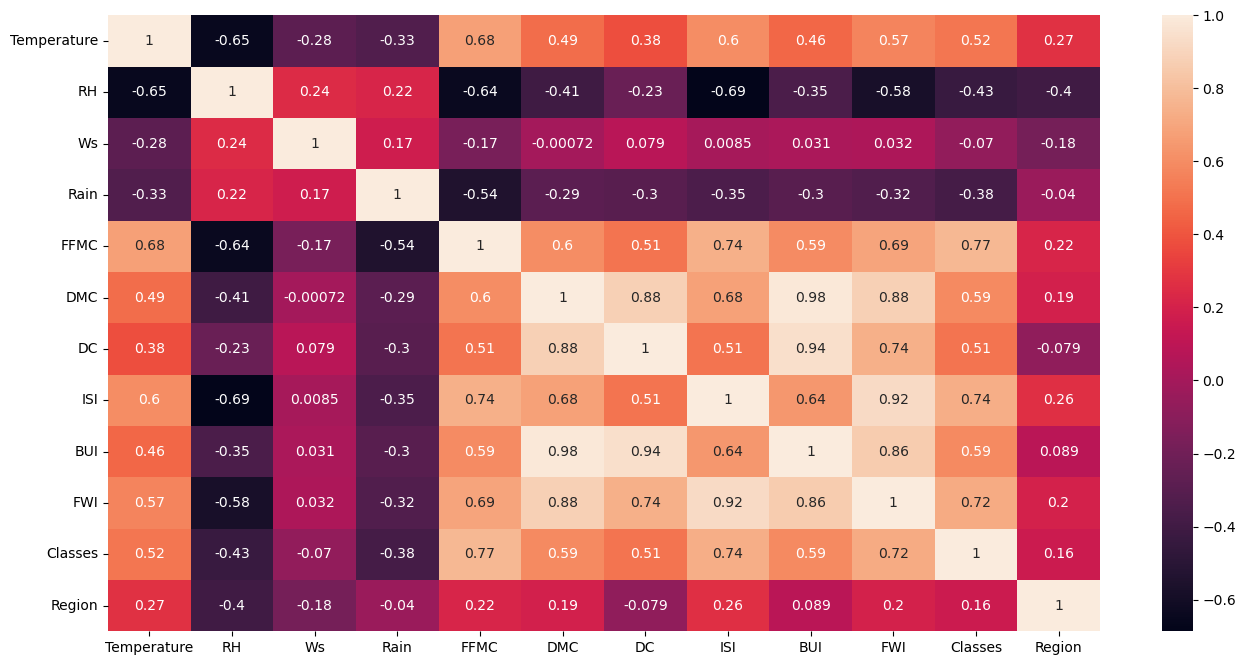

In [63]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot= True)

In [64]:
x = df.drop("FWI", axis=1)
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [65]:
y = df["FWI"]
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=25, random_state=42)

<Axes: >

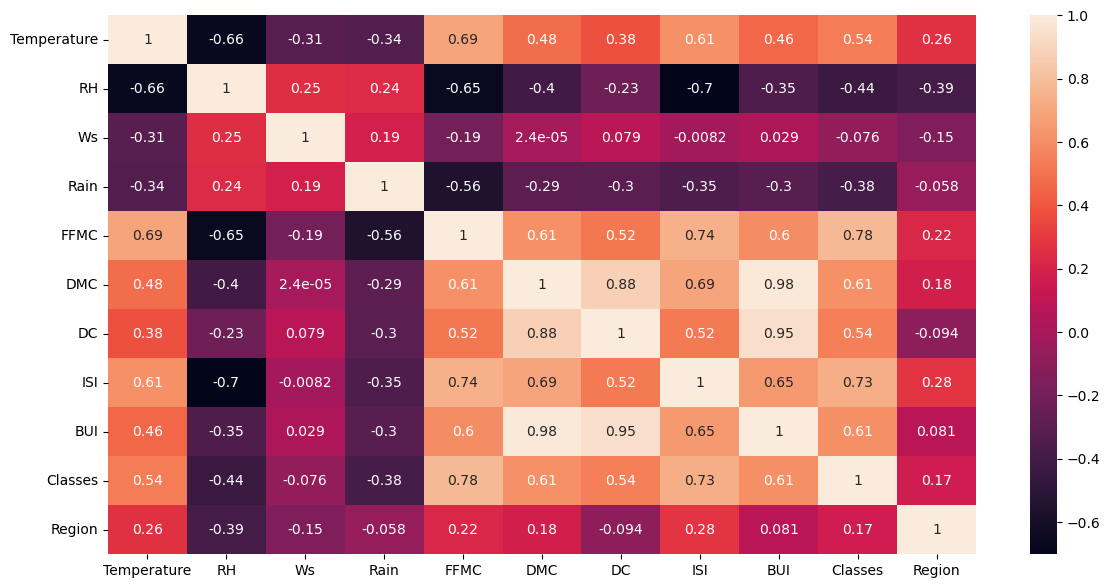

In [67]:
plt.figure(figsize=(14,7))
sns.heatmap(x_train.corr(), annot=True)

In [68]:
# Removing Features based on high colinearity

def correlation(data, thres):
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > thres:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [69]:
corr_feat = correlation(x_train,0.85)
corr_feat

{'BUI', 'DC'}

In [70]:
x_train.drop(corr_feat, axis=1, inplace=True)
x_test.drop(corr_feat, axis=1, inplace=True)

In [71]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
164,39,45,13,0.6,85.2,11.3,4.2,1,1
10,31,65,14,0.0,84.5,12.5,4.0,1,0
73,35,63,15,0.0,87.0,19.0,5.9,1,0
93,22,86,15,10.1,30.5,0.7,0.0,0,0
155,34,58,18,0.0,88.0,13.6,8.0,1,1
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [72]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
175,39,64,9,1.2,73.8,11.7,1.1,0,1
215,28,75,16,0.0,82.2,4.4,3.3,1,1
150,37,36,13,0.6,86.2,17.9,4.8,1,1
9,28,79,12,0.0,73.2,9.5,1.3,0,0
113,31,50,19,0.6,77.8,10.6,2.4,0,0


In [73]:
#standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [74]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

Text(0.5, 1.0, 'x_train After scalling')

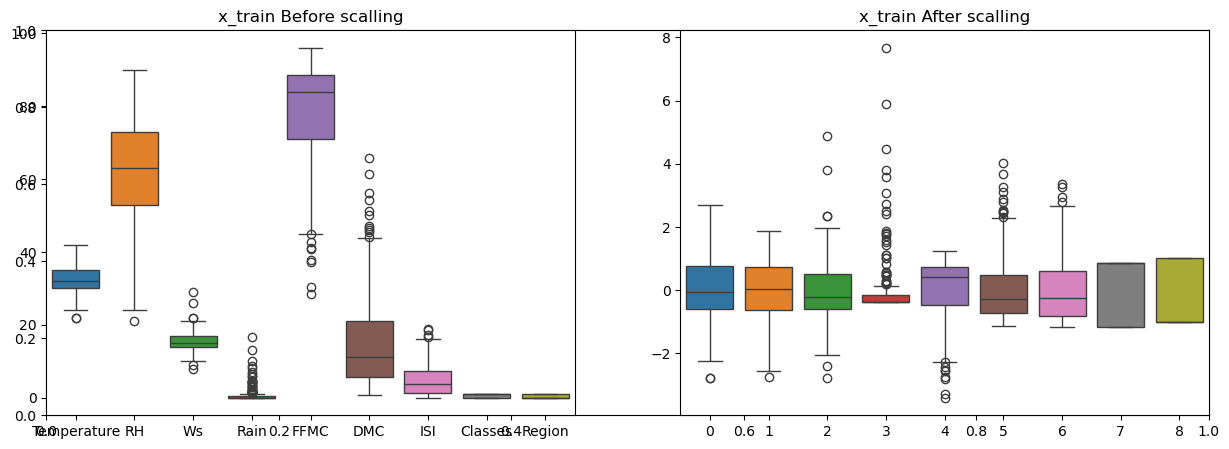

In [75]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("x_train Before scalling")
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title("x_train After scalling")

In [76]:
#pip install shap

In [77]:
#pip install xgboost

In [78]:
# Tring Shap
import shap
import xgboost

In [79]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [80]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [81]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [82]:
model = xgboost.XGBRFRegressor().fit(x,y)

In [83]:
explainer = shap.Explainer(model)

In [84]:
shap_values = explainer(x)

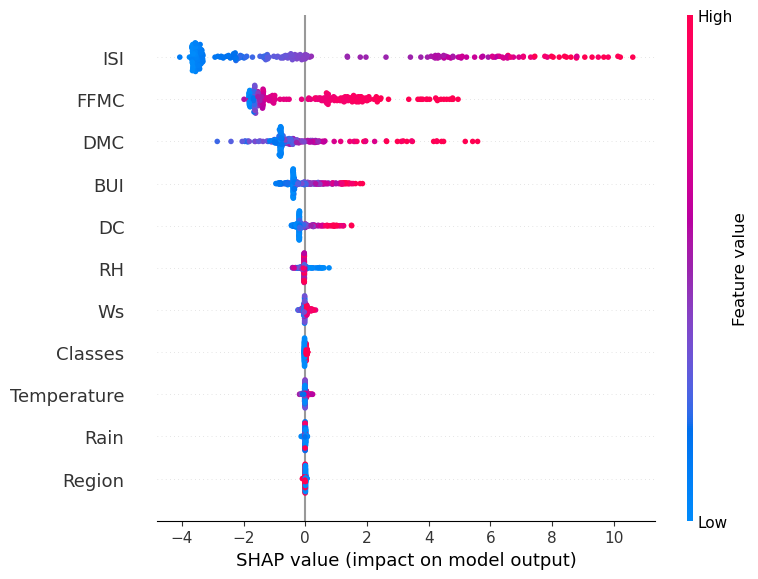

In [85]:
shap.summary_plot(shap_values,x)

We can use this plot to see which feature are important and which are not. So based on this graph we will do our regression and we will do regression without removing them to compare the result.

# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [89]:
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [90]:
reg.coef_

array([-1.22735343e-02, -1.67156390e-01,  3.91864909e-03, -4.24224903e-02,
       -8.77507367e-01,  3.69503748e+00,  4.77294930e+00,  3.69814506e-01,
       -3.83383509e-01])

In [91]:
reg.intercept_

7.221100917431193

In [101]:
y_pred = reg.predict(x_test_scaled)
y_pred

array([ 8.17565069,  7.72600371, -0.24458586,  4.36795326,  6.63956217,
        1.41849874,  1.97357634,  7.77554743,  1.70363054,  3.31046224,
        0.37276048,  9.75419815,  9.31860133, 17.08959784, 18.5407668 ,
        1.25576029,  1.85691622,  0.06369701,  7.14607491,  3.02728328,
        1.44676196,  0.25635158,  6.53579906,  0.34448214, 21.2299476 ])

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 0.9278310124488509
mean_absolute_error = 0.5988513671465985
r2_score = 0.9740723181968336


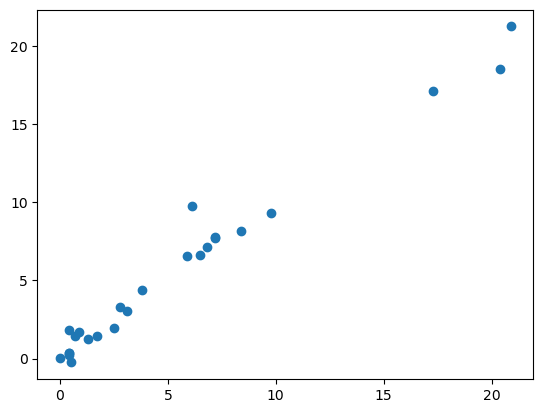

In [105]:
plt.scatter(y_test,y_pred)

# Lasso Regression

In [109]:
from sklearn.linear_model import Lasso
lasso = Lasso()


In [110]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [111]:
lasso.predict(x_test_scaled)

array([ 7.86794879,  7.49686461,  1.08612494,  5.59769   ,  7.18236579,
        3.00988945,  3.31785919,  7.91125933,  2.67341038,  3.9542525 ,
        1.52402633,  9.93905581,  9.40757096, 15.78000274, 16.34065675,
        2.9665789 ,  2.59375166, -0.3823273 ,  7.11968465,  4.08135785,
        2.80900452,  0.85542092,  6.48111498,  0.82734489, 19.22728831])

In [112]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.99747437,  3.8898132 ,  0.        , -0.        ])

In [113]:
lasso.intercept_

7.221100917431192

In [114]:
y_pred = lasso.predict(x_test_scaled)

In [115]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [116]:
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 2.5560484672948975
mean_absolute_error = 1.2554366587952894
r2_score = 0.928572756844397


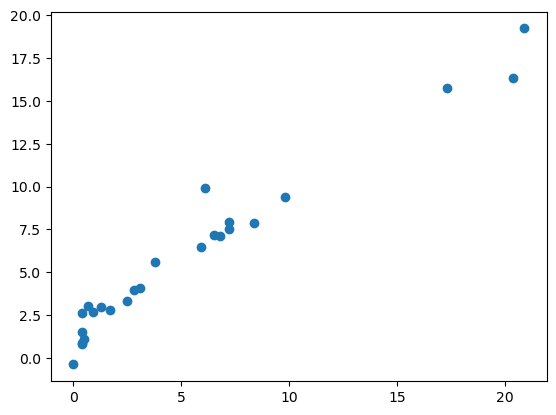

In [117]:
plt.scatter(y_test,y_pred)

# Ridge Regression

In [123]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [125]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [131]:
ridge.coef_

array([-0.00806743, -0.19133572,  0.0192603 , -0.03997342, -0.84367144,
        3.68371395,  4.69741789,  0.39234983, -0.37786779])

In [127]:
y_pred = ridge.predict(x_test_scaled)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [129]:
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 0.9372193239645839
mean_absolute_error = 0.5954907281568314
r2_score = 0.9738099674558226


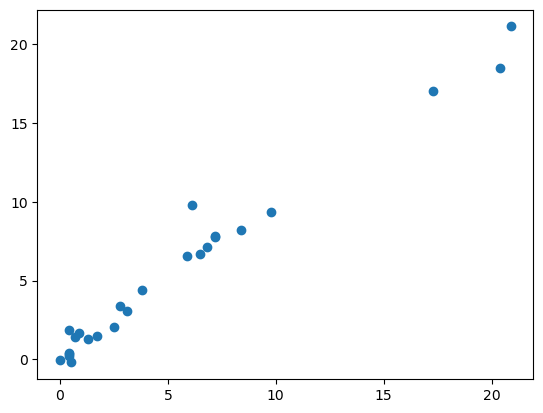

In [132]:
plt.scatter(y_test,y_pred)

# Elastic Net Regression

In [133]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [134]:
en.fit(x_train_scaled,y_train)

ElasticNet()

In [135]:
en.coef_

array([ 0.16231316, -0.41932908,  0.        , -0.        ,  0.33511605,
        2.39362368,  2.374878  ,  0.81831555,  0.        ])

In [136]:
en.intercept_

7.221100917431191

In [137]:
y_pred = en.predict(x_test_scaled)

In [138]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [139]:
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 4.977264564770715
mean_absolute_error = 1.8619288218313426
r2_score = 0.8609133234887804


# Cross Validation Lasso

In [151]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [152]:
lassocv.predict(x_test_scaled)

array([ 8.16150081,  7.68264523, -0.2635294 ,  4.51374597,  6.69010386,
        1.59246993,  2.08239393,  7.64477109,  1.84008833,  3.30074164,
        0.47145488,  9.82276417,  9.32337868, 17.06243046, 18.44888212,
        1.42406404,  1.70809948, -0.22113923,  7.22029437,  3.01377129,
        1.70608508,  0.23530821,  6.47311776,  0.24022854, 21.20188823])

In [153]:
lassocv.alpha_

0.022767427891816943

In [154]:
lassocv.alphas_

array([6.95284351, 6.48424513, 6.04722871, 5.63966573, 5.25957114,
       4.90509365, 4.57450675, 4.26620031, 3.97867268, 3.71052346,
       3.4604466 , 3.22722408, 3.00971998, 2.80687492, 2.61770095,
       2.44127667, 2.27674279, 2.12329795, 1.98019477, 1.84673627,
       1.72227243, 1.60619703, 1.49794473, 1.39698826, 1.30283593,
       1.21502915, 1.13314025, 1.05677039, 0.9855476 , 0.91912499,
       0.85717904, 0.79940805, 0.74553062, 0.69528435, 0.64842451,
       0.60472287, 0.56396657, 0.52595711, 0.49050936, 0.45745068,
       0.42662003, 0.39786727, 0.37105235, 0.34604466, 0.32272241,
       0.300972  , 0.28068749, 0.26177009, 0.24412767, 0.22767428,
       0.21232979, 0.19801948, 0.18467363, 0.17222724, 0.1606197 ,
       0.14979447, 0.13969883, 0.13028359, 0.12150291, 0.11331403,
       0.10567704, 0.09855476, 0.0919125 , 0.0857179 , 0.0799408 ,
       0.07455306, 0.06952844, 0.06484245, 0.06047229, 0.05639666,
       0.05259571, 0.04905094, 0.04574507, 0.042662  , 0.03978

In [145]:
lassocv.mse_path_

array([[44.91877239, 57.81529913, 60.16430197, 77.81895603, 38.08575384],
       [40.1009786 , 52.39913063, 54.34106188, 77.81895603, 34.00755875],
       [35.79769128, 46.06330178, 48.46479145, 71.39578194, 30.45510025],
       [31.29298721, 40.53061987, 43.11975749, 63.80841623, 26.43269905],
       [27.37139082, 35.6980113 , 37.81725714, 56.61546249, 22.9496153 ],
       [23.95712901, 31.47564774, 33.23055199, 49.64523726, 19.93486308],
       [20.98410891, 27.78529392, 29.26428658, 43.57052483, 17.32645411],
       [18.39556524, 24.55895218, 25.8367171 , 38.27536518, 15.07054053],
       [16.14137783, 21.7372652 , 22.87589366, 33.65864449, 13.12013421],
       [14.1781853 , 19.26857629, 20.31965372, 29.63345765, 11.43508089],
       [12.46826154, 17.10783111, 18.11402383, 26.12307785,  9.97984704],
       [10.97878243, 15.21594404, 16.21175672, 23.0610895 ,  8.72380142],
       [ 9.6809637 , 13.55869183, 14.57299868, 20.38968487,  7.64034967],
       [ 8.55043246, 12.10630732, 13.1

In [155]:
lassocv.coef_

array([-0.        , -0.05165987,  0.        ,  0.        , -0.66738577,
        3.65125937,  4.78431569,  0.25512182, -0.33976174])

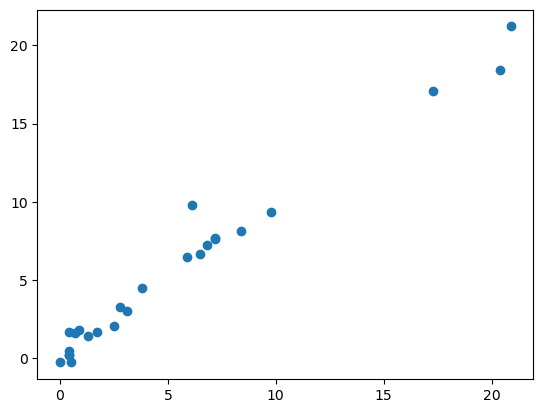

In [146]:
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

In [147]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean_squared_error = {mse}")
print(f"mean_absolute_error = {mae}")
print(f"r2_score = {r2}")

mean_squared_error = 0.9643176604505403
mean_absolute_error = 0.6163643469772864
r2_score = 0.9730527206766396


In [157]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}